In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv("train1.csv")
store_df = pd.read_csv("stores.csv")
test_df = pd.read_csv("test.csv")
feature_df = pd.read_csv("features.csv")

In [3]:
train_df

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [4]:
feature_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [5]:
test_df

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [6]:
store_df

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [7]:
(train_df['Weekly_Sales'] < 0).value_counts()

False    420285
True       1285
Name: Weekly_Sales, dtype: int64

In [8]:
# Drop all rows where weekly sales is negative
NegIndex = train_df[train_df["Weekly_Sales"] < 0].index
train_df.drop(NegIndex)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [9]:
train_df

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [11]:
train_df.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [12]:
train_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [13]:
feature_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [14]:
feature_df.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [15]:
feature_df.drop(["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"], axis = 1)

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,211.350143,8.106,False
...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,NaN,NaN,False


In [16]:
feature_df['CPI'].fillna(feature_df['CPI'].mean())

0       211.096358
1       211.242170
2       211.289143
3       211.319643
4       211.350143
           ...    
8185    172.460809
8186    172.460809
8187    172.460809
8188    172.460809
8189    172.460809
Name: CPI, Length: 8190, dtype: float64

In [17]:
# Types of merging
# inner, outer, left, right joins

In [18]:
dataset_m = feature_df.merge(store_df, how="inner", on= "Store")
dataset_m

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,B,118221
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,B,118221
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,B,118221
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,B,118221


In [19]:
dataset_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
 12  Type          8190 non-null   object 
 13  Size          8190 non-null   int64  
dtypes: bool(1), float64(9), int64(2), object(2)
memory usage: 903.8+ KB


In [20]:
pd.to_datetime(dataset_m["Date"]).dt.day

0        5
1       12
2       19
3       26
4        5
        ..
8185    28
8186     5
8187    12
8188    19
8189    26
Name: Date, Length: 8190, dtype: int64

In [21]:
dataset_m["Date"] =  pd.to_datetime(dataset_m["Date"])
dataset_m["Day"] = dataset_m["Date"].dt.day
dataset_m["Week"] = dataset_m["Date"].dt.week
dataset_m["Month"] = dataset_m["Date"].dt.month
dataset_m["Weekday"] = dataset_m["Date"].dt.weekday
dataset_m

C:\Users\harsh\AppData\Local\Temp\ipykernel_10728\1198529545.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  dataset_m["Week"] = dataset_m["Date"].dt.week


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Day,Week,Month,Weekday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,5,2,4
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315,12,6,2,4
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315,19,7,2,4
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315,26,8,2,4
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315,5,9,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,B,118221,28,26,6,4
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,B,118221,5,27,7,4
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,B,118221,12,28,7,4
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,B,118221,19,29,7,4


In [22]:
train_df_1 = train_df.merge(feature_df, how="inner", on =["Store", "Date"])
train_df_1

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False


Visualization

<AxesSubplot: xlabel='Store', ylabel='Weekly_Sales'>

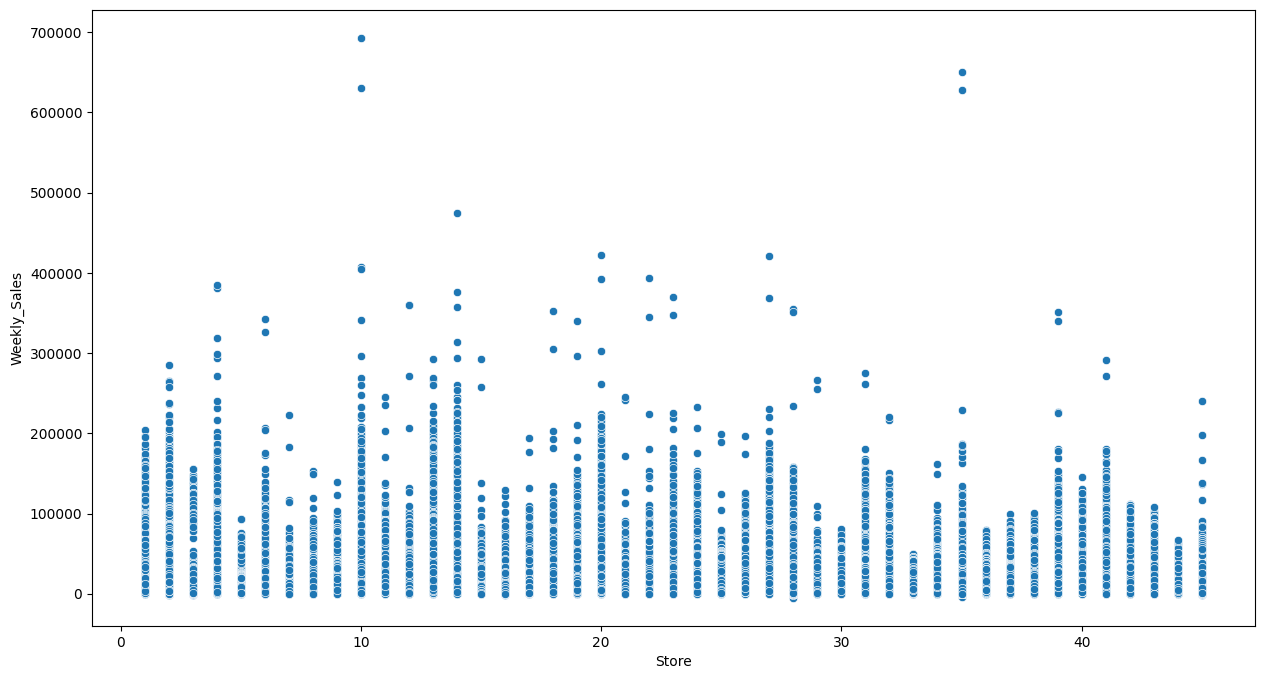

In [23]:
plt.figure(figsize=[15, 8])
sns.scatterplot(x = train_df_1["Store"], y = train_df_1["Weekly_Sales"])

<AxesSubplot: xlabel='Weekly_Sales', ylabel='Count'>

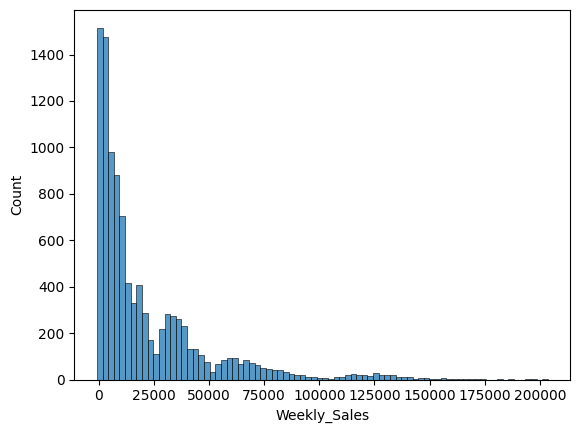

In [24]:
df=train_df_1[train_df_1["Store"] == 1]
sns.histplot(df["Weekly_Sales"])

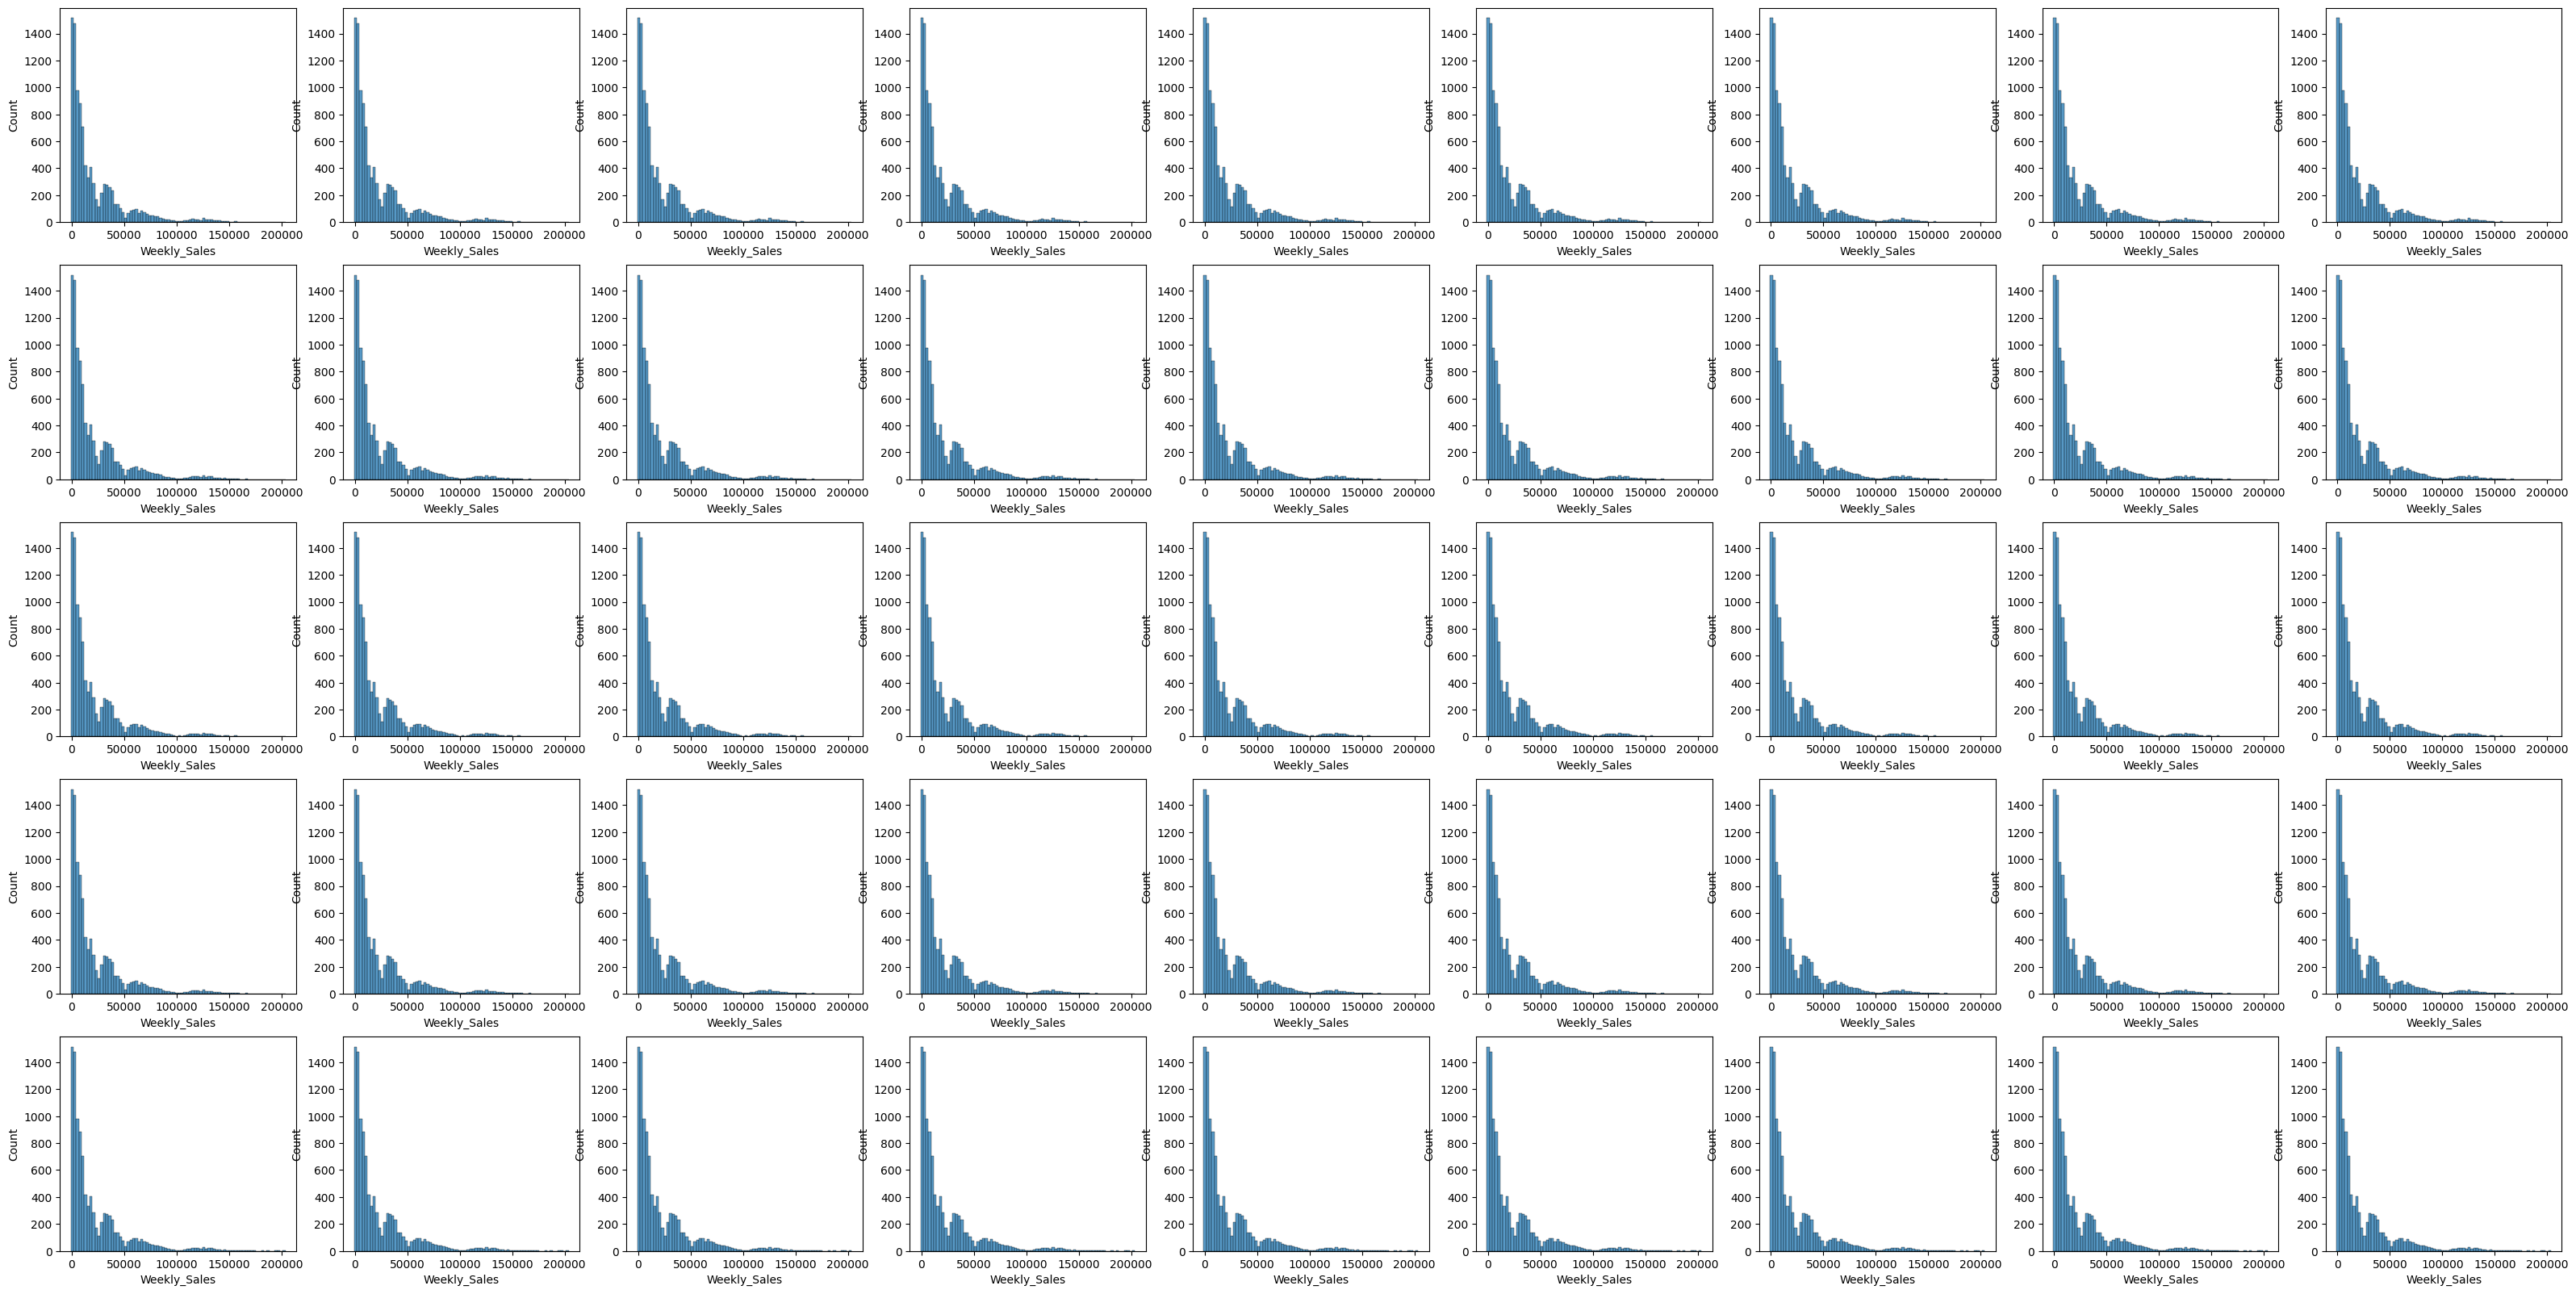

In [25]:
plt.figure(figsize = [40, 20])
for i in range(0, 45):
    plt.subplot(5, 9, i+1)
    sns.histplot(x =df["Weekly_Sales"])

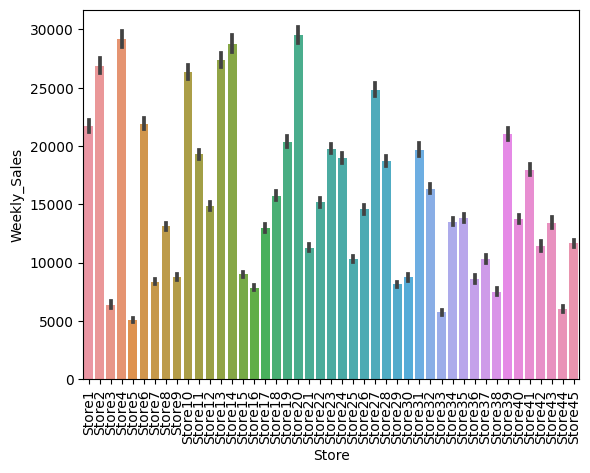

In [26]:
a = sns.barplot(x = train_df_1["Store"], y = train_df_1["Weekly_Sales"])
a.set_xticklabels(labels = ["Store" + str(i) for i in range(1, 46)])
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot: xlabel='Store', ylabel='Weekly_Sales'>

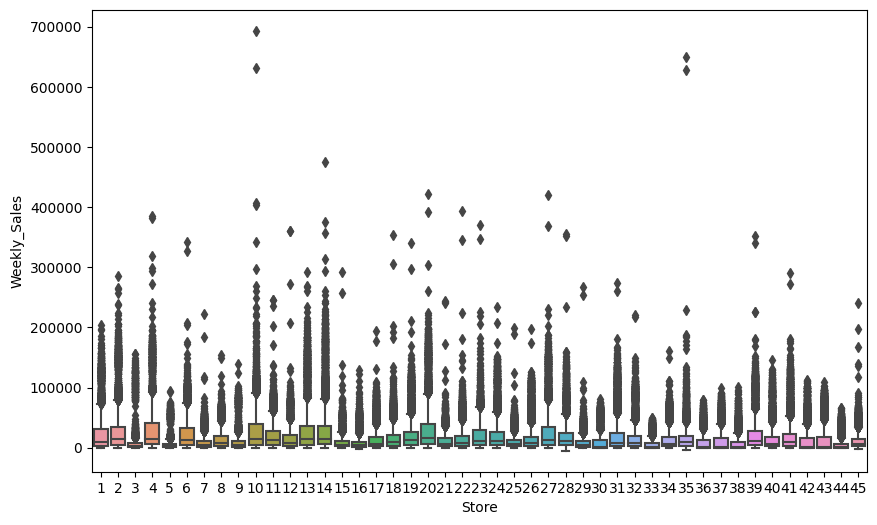

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(x = train_df_1['Store'],y = train_df_1['Weekly_Sales'])

In [31]:
train_df_1["Date"] =  pd.to_datetime(train_df_1["Date"])
train_df_1["Week"] = train_df_1["Date"].dt.week
train_df_1["Year"] = train_df_1["Date"].dt.year


C:\Users\harsh\AppData\Local\Temp\ipykernel_10728\267911815.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  train_df_1["Week"] = train_df_1["Date"].dt.week


<AxesSubplot: xlabel='Week', ylabel='Weekly_Sales'>

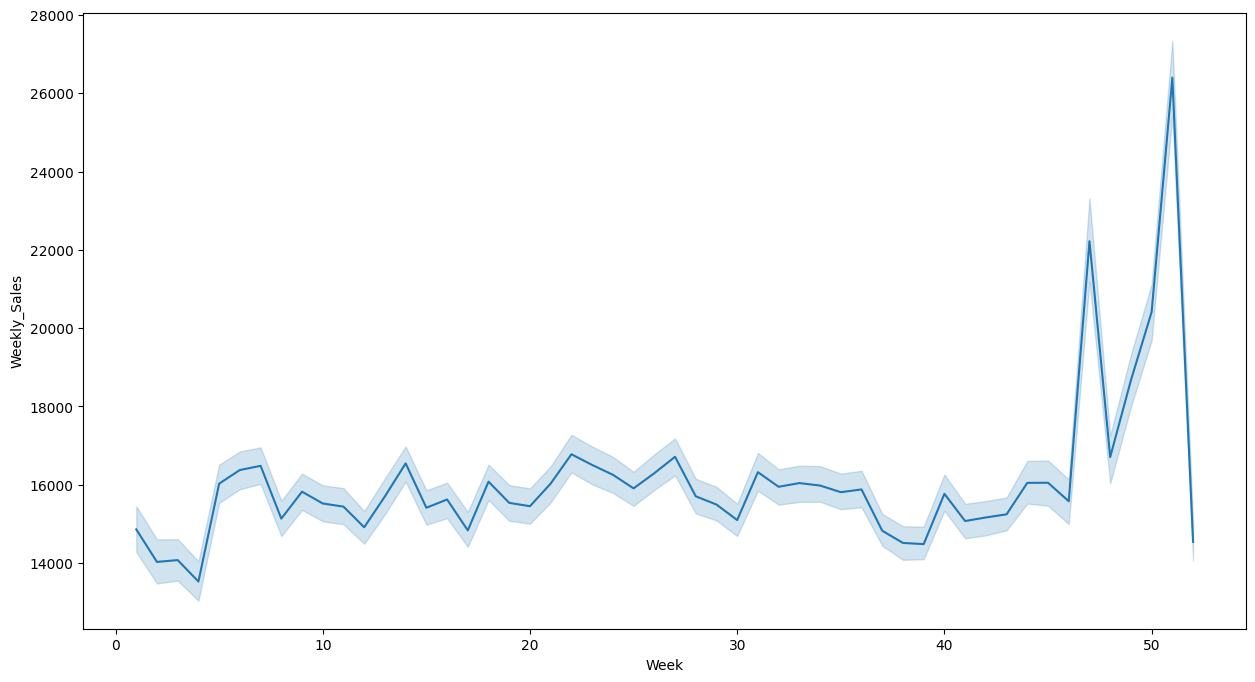

In [32]:
plt.figure(figsize=[15, 8])
sns.lineplot(x = train_df_1["Week"], y = train_df_1['Weekly_Sales'])

In [33]:
train_df_1.groupby(['Year']).mean()

C:\Users\harsh\AppData\Local\Temp\ipykernel_10728\3421714912.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train_df_1.groupby(['Year']).mean()


,Store,Dept,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Week
Year,,,,,,,,,,,,,,,
2010,22.151629,44.147428,16270.275737,0.083694,59.659916,2.823858,NaN,NaN,NaN,NaN,NaN,167.727885,8.446427,0.083694,28.486512
2011,22.206350,44.217787,15954.070675,0.077679,58.220745,3.563353,4534.018155,7808.916193,8259.218705,1531.493447,6393.284052,171.181195,8.036353,0.077679,26.582354
2012,22.247556,44.436149,15694.948597,0.046823,62.815807,3.710378,7752.668598,2344.719387,56.254594,3725.173447,4296.791355,175.061958,7.332047,0.046823,21.980822


In [35]:
data2011 = train_df_1[train_df_1["Year"]==2011]

dt2011 = data2011.groupby("Week")["Weekly_Sales"].mean()
week11 = dt2011.index
mean_sales11 = dt2011.values

Text(0, 0.5, 'Avg Weekly Sales')

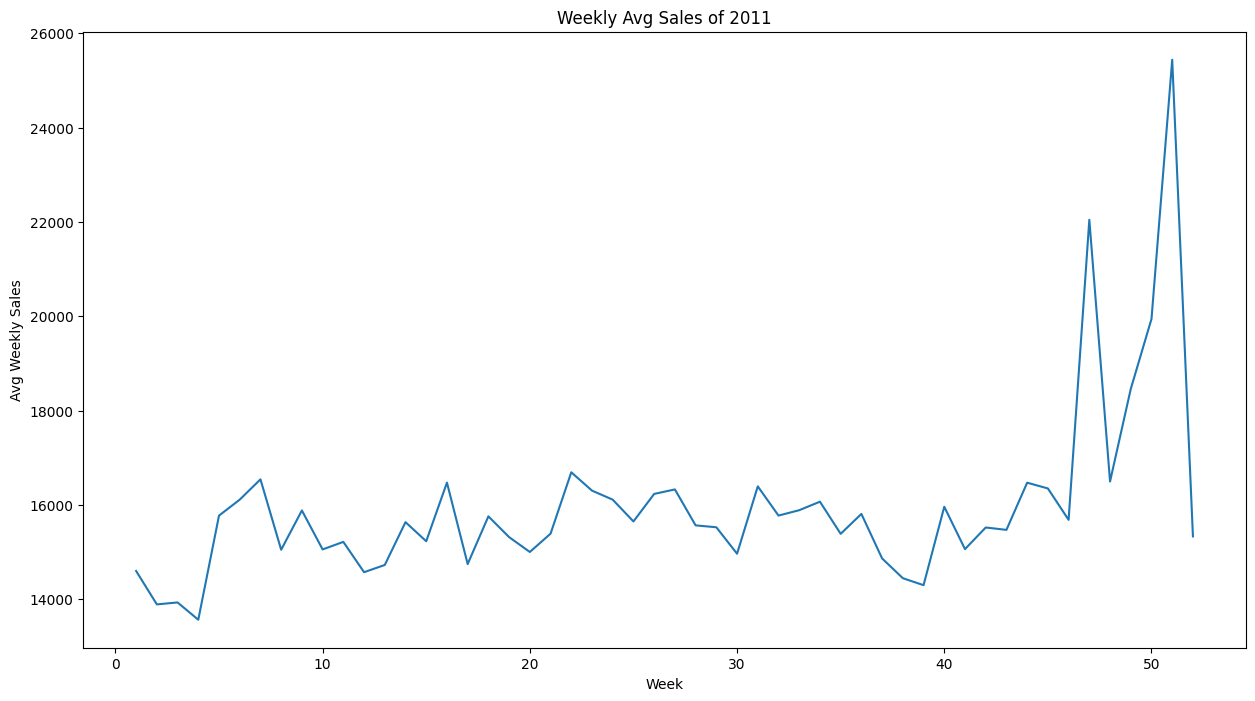

In [36]:
plt.figure(figsize = [15, 8])
sns.lineplot( x = week11, y = mean_sales11)
plt.title("Weekly Avg Sales of 2011")
plt.ylabel("Avg Weekly Sales")